In [2]:
import pandas as pd 
import numpy as np

In [189]:
df = pd.read_csv('Dataset_Rainfall.csv')
df.shape

(25288, 13)

In [173]:
df['Station'].unique()

array(['Barisal', 'Bhola', 'Bogra', 'Chandpur',
       'Chittagong (City-Ambagan)', 'Chittagong (IAP-Patenga)',
       'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur',
       'Faridpur', 'Feni', 'Hatiya', 'Ishurdi', 'Jessore', 'Khepupara',
       'Khulna', 'Kutubdia', 'Madaripur', 'Maijdee Court', 'Mongla',
       'Mymensingh', 'Patuakhali', 'Rajshahi', 'Rangamati', 'Rangpur',
       'Sandwip', 'Satkhira', 'Sitakunda', 'Srimangal', 'Syedpur',
       'Sylhet', 'Tangail', 'Teknaf'], dtype=object)

In [ ]:
year_range = df.groupby("Station")["Year"].agg(First_Year="min", Last_Year="max").reset_index()

station_coords = df[["Station", "Latitude", "Longitude"]].drop_duplicates(subset=["Station"])

df_stations = pd.merge(year_range, station_coords, on="Station", how="left")

df_stations["Availability"] = df_stations["First_Year"].astype(str) + " - " + df_stations["Last_Year"].astype(str)

df_stations.head()


,Station,First_Year,Last_Year,Latitude,Longitude,Availability
0,Barisal,1949,2023,22.7010,90.3535,1949 - 2023
1,Bhola,1966,2023,22.6859,90.6480,1966 - 2023
2,Bogra,1948,2023,24.8510,89.3697,1948 - 2023
3,Chandpur,1964,2023,23.2333,90.6667,1964 - 2023
4,Chittagong (City-Ambagan),2009,2023,22.3666,91.8000,2009 - 2023


In [188]:
df_stations

,Station,First_Year,Last_Year,Latitude,Longitude,Availability
0,Barisal,1949,2023,22.7010,90.3535,1949 - 2023
1,Bhola,1966,2023,22.6859,90.6480,1966 - 2023
2,Bogra,1948,2023,24.8510,89.3697,1948 - 2023
3,Chandpur,1964,2023,23.2333,90.6667,1964 - 2023
4,Chittagong (City-Ambagan),2009,2023,22.3666,91.8000,2009 - 2023
5,Chittagong (IAP-Patenga),1949,2023,22.2495,91.8137,1949 - 2023
6,Chuadanga,1989,2023,23.6402,88.8418,1989 - 2023
7,Comilla,1948,2023,23.4607,91.1809,1948 - 2023
8,Cox's Bazar,1948,2023,21.4272,92.0058,1948 - 2023
9,Dhaka,1953,2023,23.8103,90.4125,1953 - 2023


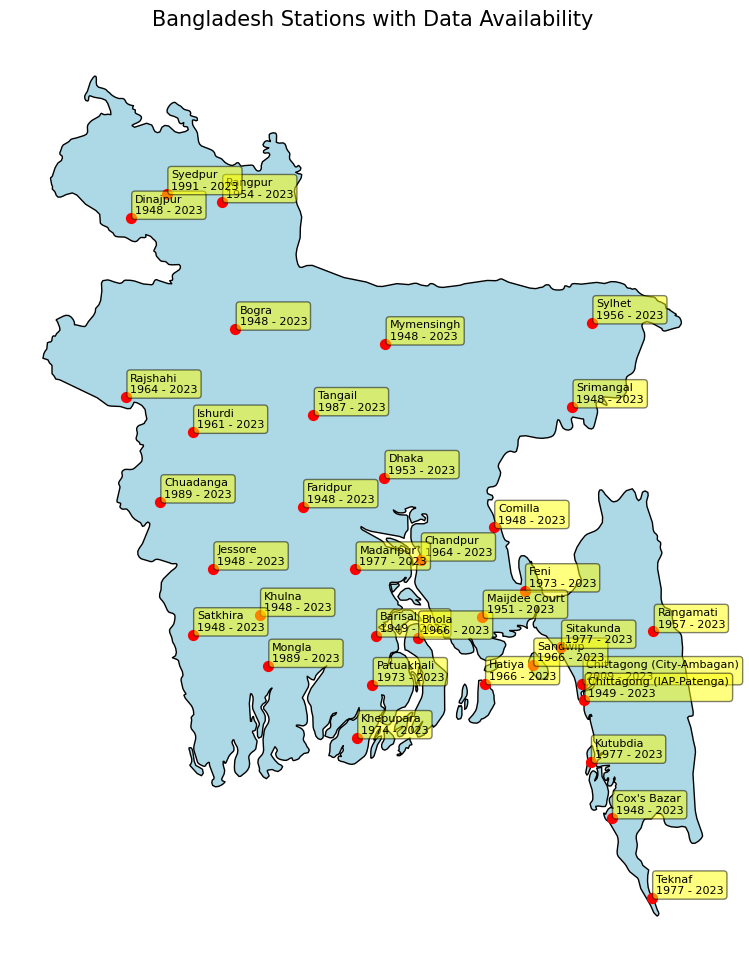

In [179]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load Bangladesh map GeoJSON
bangladesh = gpd.read_file("bangladesh_boundary.geojson")

# Prepare your stations DataFrame (df_stations)
# Make sure it has 'Latitude', 'Longitude', 'Station', 'Availability' columns

# Convert stations to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_stations["Longitude"], df_stations["Latitude"])]
gdf_stations = gpd.GeoDataFrame(df_stations, geometry=geometry)


fig, ax = plt.subplots(figsize=(12, 12))

# Plot Bangladesh map
bangladesh.plot(ax=ax, color="lightblue", edgecolor="black")

# Plot stations
gdf_stations.plot(ax=ax, color='red', markersize=50)

# Add labels: station name + availability span
for idx, row in gdf_stations.iterrows():
    ax.annotate(
        f"{row['Station']}\n{row['Availability']}",
        xy=(row.geometry.x, row.geometry.y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5),
    )

# Clean axes
ax.set_axis_off()
plt.title("Bangladesh Stations with Data Availability", fontsize=15)

plt.show()


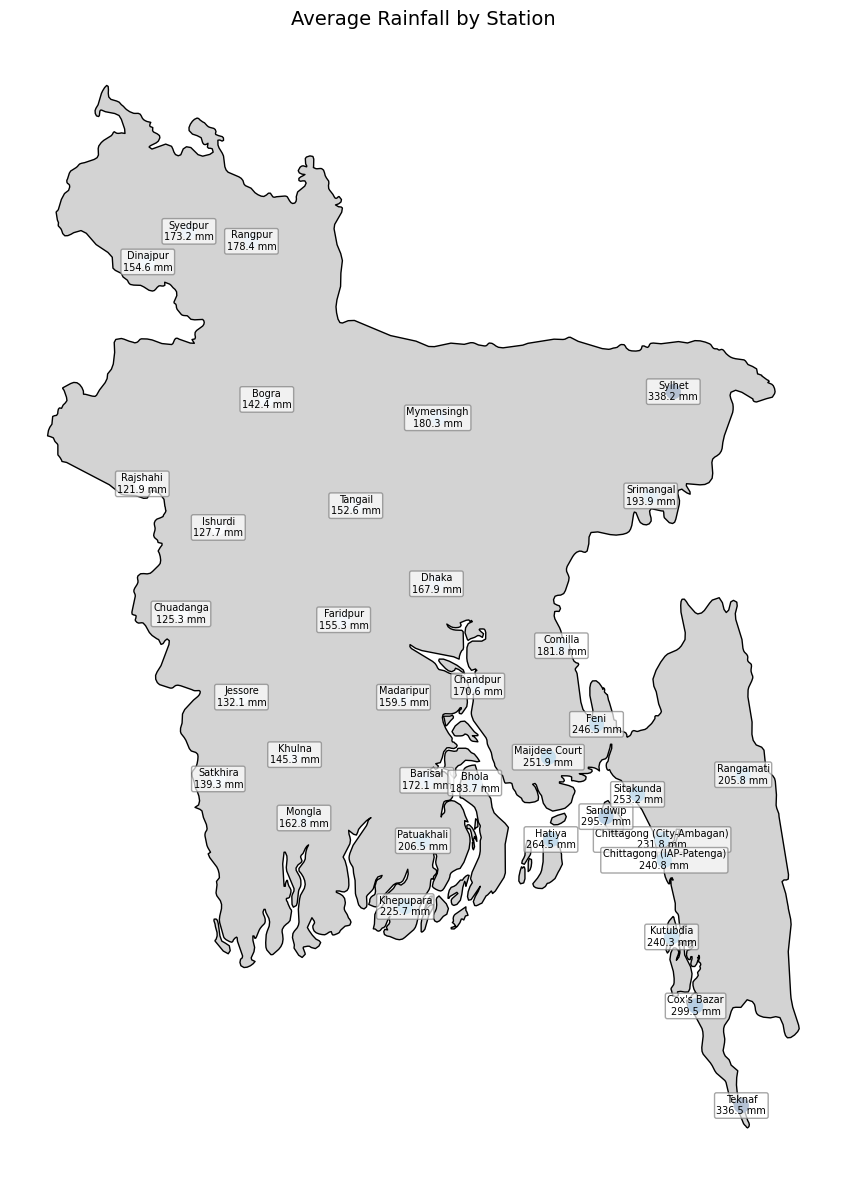

In [182]:
rainfall_avg = df.groupby(['Station', 'Latitude', 'Longitude'])['Rainfall(mm)'].mean().reset_index()
gdf_rainfall = gpd.GeoDataFrame(
    rainfall_avg, 
    geometry=gpd.points_from_xy(rainfall_avg['Longitude'], rainfall_avg['Latitude']),
    crs='EPSG:4326'
)

fig, ax = plt.subplots(figsize=(10, 12))

# Plot Bangladesh base map
bangladesh.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot station points with rainfall color
gdf_rainfall.plot(
    ax=ax,
    column='Rainfall(mm)',
    cmap='Blues',
    markersize=100,
    legend=False,
    legend_kwds={'label': "Average Rainfall (mm)"}
)

# Add labels: Station Name + Rainfall Value
for x, y, station, rainfall in zip(gdf_rainfall.geometry.x, gdf_rainfall.geometry.y,
                                   gdf_rainfall['Station'], gdf_rainfall['Rainfall(mm)']):
    ax.text(
        x, y,
        f"{station}\n{rainfall:.1f} mm",  # One decimal place
        fontsize=7,
        ha='center',
        va='center',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.7)
    )

ax.set_title("Average Rainfall by Station", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


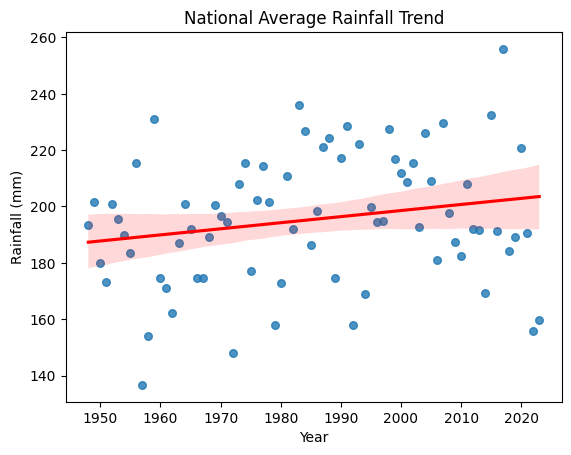

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Year and compute mean rainfall across all stations
yearly_rainfall = df.groupby('Year')['Rainfall(mm)'].mean().reset_index()

# Plot trend
sns.regplot(data=yearly_rainfall, x='Year', y='Rainfall(mm)', scatter_kws={"s": 30}, line_kws={"color": "red"})
plt.title("National Average Rainfall Trend")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Year")
plt.show()


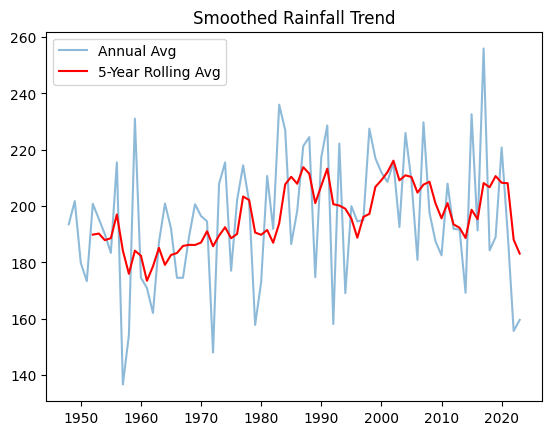

In [184]:
yearly_rainfall['RollingMean'] = yearly_rainfall['Rainfall(mm)'].rolling(window=5).mean()

plt.plot(yearly_rainfall['Year'], yearly_rainfall['Rainfall(mm)'], label='Annual Avg', alpha=0.5)
plt.plot(yearly_rainfall['Year'], yearly_rainfall['RollingMean'], label='5-Year Rolling Avg', color='red')
plt.legend()
plt.title('Smoothed Rainfall Trend')
plt.show()


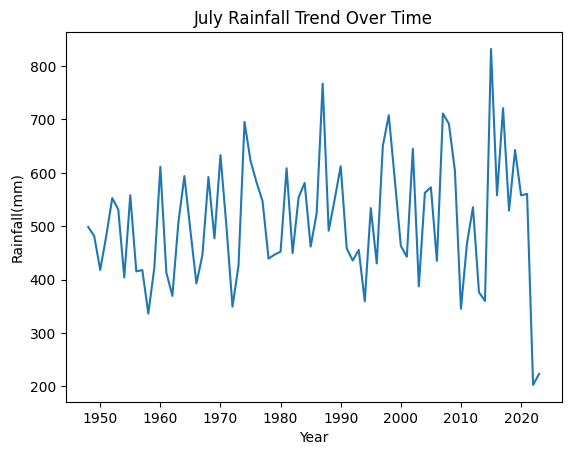

In [185]:
# Rainfall trend in July over the years
july_data = df[df['Month'] == 7].groupby('Year')['Rainfall(mm)'].mean().reset_index()

sns.lineplot(data=july_data, x='Year', y='Rainfall(mm)')
plt.title('July Rainfall Trend Over Time')
plt.show()

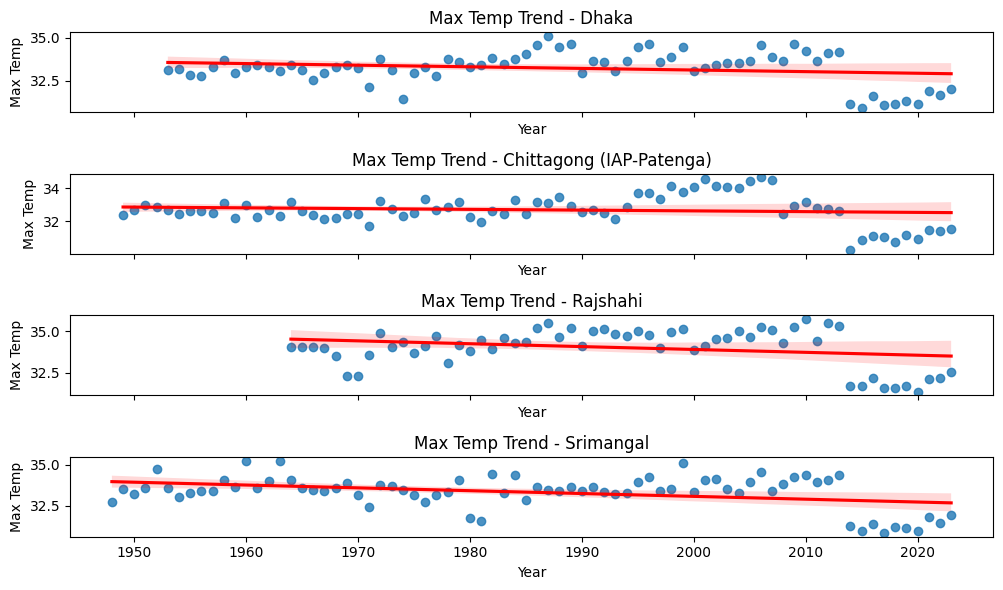

In [187]:
stations = ['Dhaka', 'Chittagong (IAP-Patenga)', 'Rajshahi', 'Srimangal']
fig, axs = plt.subplots(len(stations), 1, figsize=(10, 6), sharex=True)

for i, station in enumerate(stations):
    station_data = df[df['Station'] == station].groupby('Year')['Max Temp'].mean().reset_index()
    sns.regplot(data=station_data, x='Year', y='Max Temp', ax=axs[i], line_kws={"color": "red"})
    axs[i].set_title(f"Max Temp Trend - {station}")

plt.tight_layout()
plt.show()
